In [40]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [41]:
timeframe = "H1"
symbols = ["GBP_JPY"]

In [42]:
# Load CSV File
def get_price_data(symbol):
    df = pd.read_csv(f"../data/{symbol}_{timeframe}.csv", parse_dates=['Datetime'], index_col='Datetime')
    df.index = pd.to_datetime(df.index, utc=True).tz_convert("Europe/London")
    return df

In [43]:
price = get_price_data(symbols[0])
price['Hour'] = price.index.hour  # Extract hour of the day

In [44]:
# Calculate move size (High - Low)
price['MoveSize'] = price['High'] - price['Low']

In [45]:
# Calculate average volume per hour
average_volume = price.groupby('Hour')['Volume'].mean()

# Calculate average move size per hour
average_move_size = price.groupby('Hour')['MoveSize'].mean()

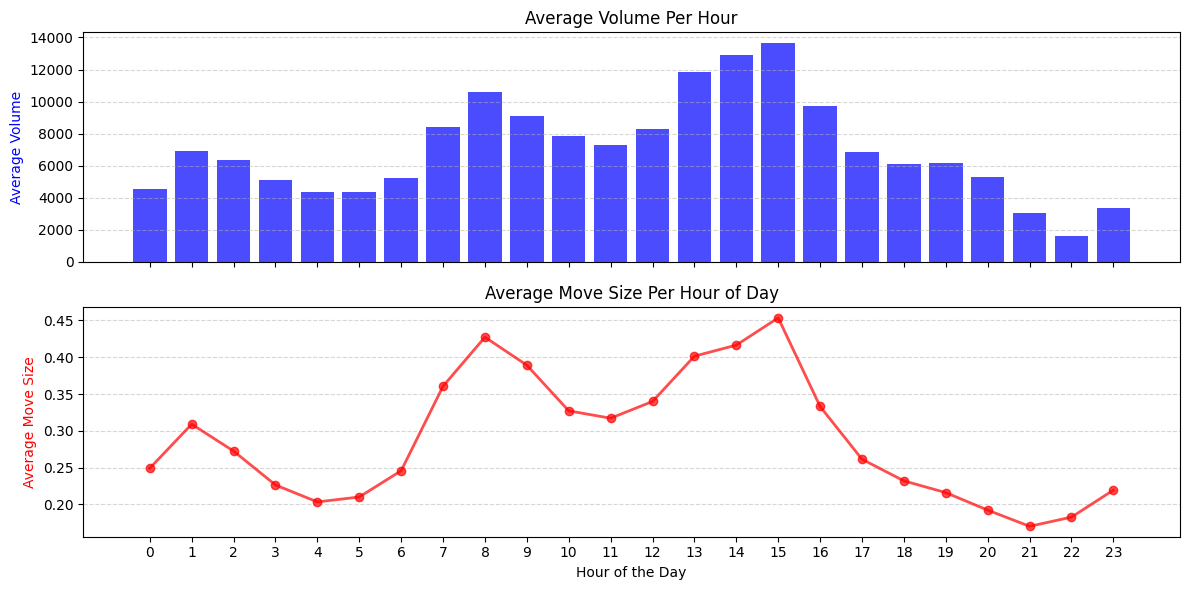

In [46]:
# Plotting the results
fig, axes = plt.subplots(2, 1, figsize=(12, 6), sharex=True)

# Plot average volume
axes[0].bar(average_volume.index, average_volume, color='blue', alpha=0.7)
axes[0].set_ylabel("Average Volume", color='blue')
axes[0].set_title("Average Volume Per Hour")
axes[0].grid(axis='y', linestyle='--', alpha=0.5)

# Plot average move size
axes[1].plot(average_move_size.index, average_move_size, color='red',  marker='o', linestyle='-', linewidth=2, alpha=0.7)
axes[1].set_ylabel("Average Move Size", color='red')
axes[1].set_title("Average Move Size Per Hour of Day")
axes[1].grid(axis='y', linestyle='--', alpha=0.5)

# Set x-axis ticks for all subplots
axes[-1].set_xlabel("Hour of the Day")
axes[-1].set_xticks(range(24))

# Show plot
plt.tight_layout()
plt.show()